# Импорт и начальная обработка

In [ ]:
! pip install pmdarima

In [ ]:
# Импорт библиотек
import pandas as pd
from pmdarima.arima import auto_arima
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Чтение файла
df = pd.read_csv('Temp.csv')
# Преобразуем дату к виду date-time
df.Date = pd.to_datetime(df.Date)
# Переносим преобразованную дату в индекс
df.set_index("Date", inplace = True)
df = df.iloc[0:730]
df.head(5)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<Axes: xlabel='Date'>

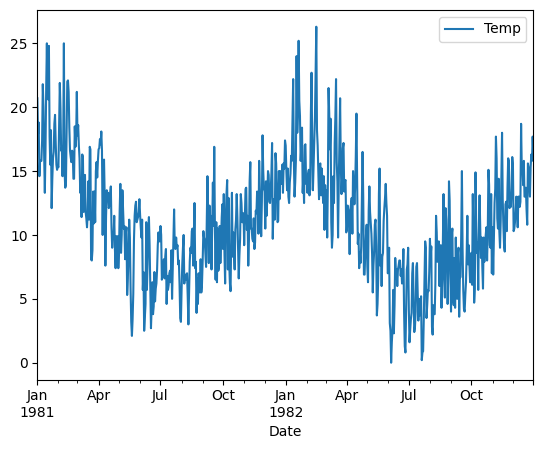

In [ ]:
# Постоим исхожный график
df.plot()

Предполагаем, что не сможем точно предсказать последовательность в исходном виде, попробуем провести сглаживание с помощью скользящего среднего. Сглаживание проведём по неделям

In [ ]:
# Сглаживание по неделям
df_rol_w = df[['Temp']].rolling('31d').mean()

In [ ]:
df_rol_w

,Temp
Date,
1981-01-01,20.700000
1981-01-02,19.300000
1981-01-03,19.133333
1981-01-04,18.000000
1981-01-05,17.560000
...,...
1982-12-27,13.380645
1982-12-28,13.503226
1982-12-29,13.619355


<Axes: xlabel='Date'>

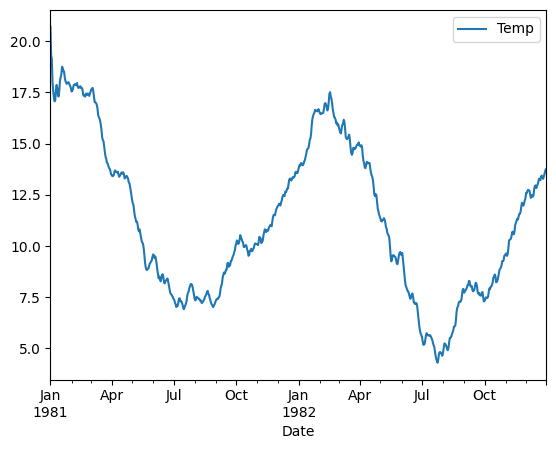

In [ ]:
# График после сглаживания
df_rol_w.plot()

# Примение модели

In [ ]:
# Выделяем тренировочные и тестовые
train = df_rol_w[:500]
val = df_rol_w[500:600]
test = df_rol_w[600:]

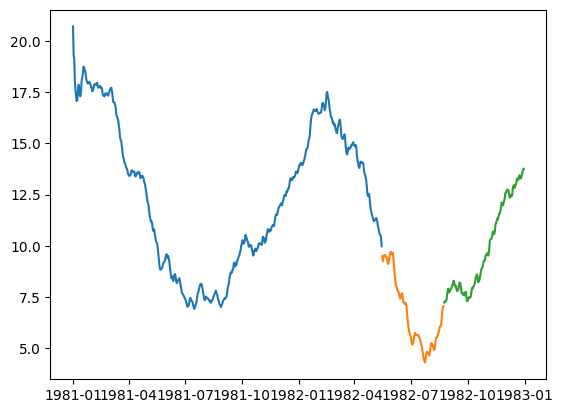

In [ ]:
plt.plot(train)
plt.plot(val)
plt.plot(test)

In [ ]:
arima_model =  auto_arima(train,start_p=0, d=0, start_q=0,
                          max_p=8, max_d=5, max_q=8, start_P=0,
                          D=0, start_Q=0, max_P=8, max_D=5,
                          max_Q=8, m=12, seasonal=True,
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2687.482, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=2.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3983.897, Time=0.03 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1350.582, Time=5.15 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=11.60 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1317.859, Time=7.44 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=1421.015, Time=8.71 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=1327.892, Time=13.83 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=inf, Time=3.80 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=20.09 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=-355.922, Tim

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 268.323
Date:                Sun, 28 Jan 2024   AIC                           -526.646
Time:                        09:22:49   BIC                           -505.573
Sample:                    01-01-1981   HQIC                          -518.377
                         - 05-15-1982                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0100      0.024      0.420      0.674      -0.037       0.056
ar.L1          1.6959      0.026     65.272      0.000       1.645       1.747
ar.L2         -0.6965      0.025    -27.531      0.000      -0.746      -0.647
ma.L1         -0.1633      0.032     -5.054      0.000      -0.227      -0.100
sigma2         0.0197      0.001     31.846      0.000       0.018       0.021
===================================================================================
Ljung-Box (L1) (Q):                   5.38   Jarque-Bera (JB):              2847.18
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                            -1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 100),index=val.index)
prediction.columns = ['Temp']
prediction

,Temp
Date,
1982-05-16,9.751307
1982-05-17,9.599501
1982-05-18,9.497307
1982-05-19,9.429737
1982-05-20,9.386331
...,...
1982-08-19,10.288046
1982-08-20,10.298260
1982-08-21,10.308452


In [ ]:
val

,Temp
Date,
1982-05-16,9.493548
1982-05-17,9.248387
1982-05-18,9.374194
1982-05-19,9.538710
1982-05-20,9.545161
...,...
1982-08-19,6.119355
1982-08-20,6.416129
1982-08-21,6.816129


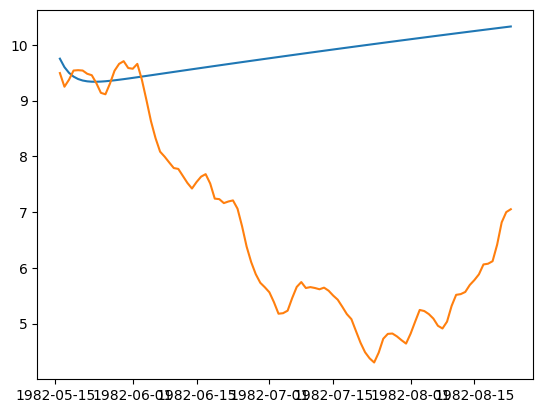

In [ ]:
plt.plot(prediction)
plt.plot(val)

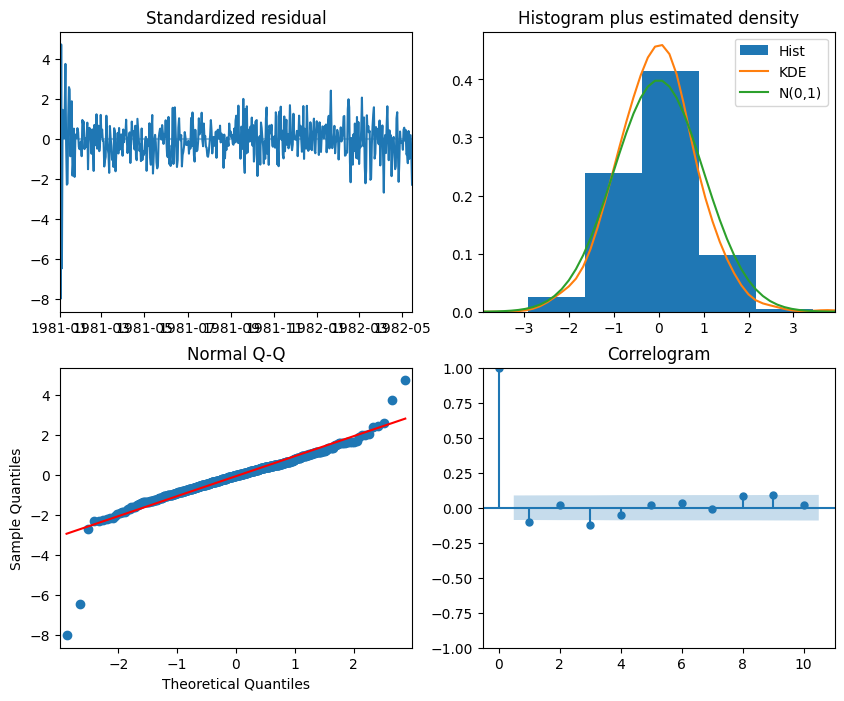

In [ ]:
arima_model.plot_diagnostics(figsize=(10,8))
plt.show()

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 268.323
Date:                Sun, 28 Jan 2024   AIC                           -526.646
Time:                        09:22:50   BIC                           -505.573
Sample:                    01-01-1981   HQIC                          -518.377
                         - 05-15-1982                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0100      0.024      0.420      0.674      -0.037       0.056
ar.L1          1.6959      0.026     65.272      0.000       1.645       1.747
ar.L2         -0.6965      0.025    -27.531      0.000      -0.746      -0.647
ma.L1         -0.1633      0.032     -5.054      0.000      -0.227      -0.100
sigma2         0.0197      0.001     31.846      0.000       0.018       0.021
===================================================================================
Ljung-Box (L1) (Q):                   5.38   Jarque-Bera (JB):              2847.18
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                            -1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(val, prediction)

-3.7093343416897495